# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head(10)
df.tail(10)


,temperature,gender,heart_rate
120,97.7,F,84.0
121,97.9,F,68.0
122,99.0,F,81.0
123,97.2,F,66.0
124,97.5,M,75.0
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


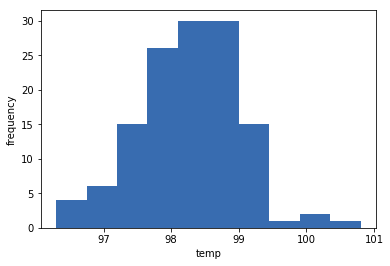

In [3]:
%matplotlib inline

#Is the distribution of body temperatures normal?
# pyplot.vlines(actual, 0, 300, linewidth=3, color='0.8')

pyplot.hist(df['temperature'], color='#386cb0')
pyplot.xlabel('temp')
pyplot.ylabel('frequency')
None

#long tail - skewed to the right.

In [28]:
df.describe()


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
#normality checks
scipy.stats.normaltest(df.temperature)
scipy.stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [5]:
#Shipiro wilks test to check normality
scipy.stats.shapiro(df.temperature)
shapiro_results = scipy.stats.shapiro(df.temperature)
shapiro_results


matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(df.temperature) - 1, shapiro_results[0], shapiro_results[1]]
]
matrix_sw

#we do not reject null hypothesis 

[['', 'DF', 'Test Statistic', 'p-value'],
 ['Sample Data', 129, 0.9865770936012268, 0.233174666762352]]

In [55]:
df.temperature.mean()
df.temperature.std()

SE = df.temperature.std()/ numpy.sqrt(len(df))
Z_Score = (df.temperature.mean()-98.6)/SE
p_value = scipy.stats.norm.sf(abs(Z_Score))*2
p_value

4.9021570141133797e-08

In [58]:
#Confidence interval on the mean
scipy.stats.norm.interval(0.95, loc=df.temperature.mean(), scale = df.temperature.std()/numpy.sqrt(len(df.temperature)))

#the temperature ranges between 98.1 and 98.4

(98.123196428181657, 98.375265110279898)

In [71]:
mean_Male = df[df.gender=='M'].temperature.mean()
Male_1 = df[df.gender=='M'].temperature.var()
mean_Female = df[df.gender=='F'].temperature.mean()
Female_1 = df[df.gender=='F'].temperature.var()
SE = ((Male_1/len(df[df.gender=='M'])+Female_1/len(df[df.gender=='F'])))**0.5
print(SE)
print(mean_Male)
print(mean_Female)

0.12655395042
98.1046153846
98.3938461538


In [72]:
z_score = (mean_Male-mean_Female)/SE
p_value = scipy.stats.norm.sf(abs(z_score))*2
p_value

# we can reject the null hypothosis, males and females have diffrent temps. 

0.02228736076067726